In [37]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [39]:
x_train = x_train.reshape(60000,28*28).astype('float32')/255
x_test = x_test.reshape(10000,28*28).astype('float32')/255

In [40]:
oht = OneHotEncoder()
y_train = oht.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = oht.transform(y_test.reshape(-1,1)).toarray()

In [41]:
x_train.shape

(60000, 784)

In [42]:
X = tf.placeholder(tf.float32, [None, 28*28])
Y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.random_normal([28*28, 10]))
b = tf.Variable(tf.random_normal([10]))

In [43]:
hf = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hf+1e-10), axis=1))

In [44]:
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [45]:
isCorrect = tf.equal(tf.argmax(hf,axis=1), tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(isCorrect, tf.float32))

In [46]:
numEpochs = 3
batchSize = 100
numIter = x_train.shape[0]//batchSize

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(numEpochs):
        avgCv = 0
        for i in range(numIter):
            batchX = x_train[batchSize*i:batchSize*(i+1)]
            batchY = y_train[batchSize*i:batchSize*(i+1)]
            _, hfv, cv = sess.run([train, hf, cost], feed_dict={X:batchX, Y:batchY})
            avgCv += cv/numIter
        print("EPOCH:{:04d},cost:{:.9f}".format(epoch+1,avgCv))
    print('정확도:', sess.run(accuracy,feed_dict={X:x_test,Y:y_test}))
    
#     print("정확도:", accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
#     r=random.randint(0,mnist.test.num_examples-1)
#     print("레이블:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
#     print("예측:", sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))
    
#     plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
#               cmap='Greys')
#     plt.show()
    sess.close()

EPOCH:0001,cost:2.727397493
EPOCH:0002,cost:1.052897788
EPOCH:0003,cost:0.841487768
정확도: 0.8425


In [48]:
x_test.shape
x_test[[0]].shape

(1, 784)

케라스 버전

In [49]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import numpy as np

Using TensorFlow backend.


In [50]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28*28).astype('float32')/255.0
x_test = x_test.reshape(10000,28*28).astype('float32')/255.0

In [51]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [52]:
xTrn = x_train[:42000]
xTst = x_train[42000:]
yTrn = y_train[:42000]
yTst = y_train[42000:]

In [53]:
# 모델 구성
model = Sequential()
model.add(Dense(units=1000, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [54]:
# 학습 환경 설정
from keras.optimizers import SGD, Adam

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# adam = Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [507]:
# 학습
model.fit(xTrn, yTrn, epochs=30, batch_size=1000, validation_data=(xTst, yTst))

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 4s 84us/step - loss: 1.9770 - accuracy: 0.5510 - val_loss: 1.9388 - val_accuracy: 0.2637
Epoch 2/30
21000/42000 [==============>...............] - ETA: 1s - loss: 1.9986 - accuracy: 0.2739

KeyboardInterrupt: 

In [505]:
# 모델 평가
lossVal, accuracy = model.evaluate(x_test, y_test, batch_size=100)
print(f'Loss : {lossVal:.3f}, 정확도 : {accuracy:.3f}')

10000/10000 [==============================] - 1s 52us/step
Loss : 0.540, 정확도 : 0.898


In [55]:
# 렌덤 뽑기
idx = np.random.choice(x_test.shape[0],1000)
xhat = x_test[idx]
yhat = model.predict_classes(xhat)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_test[idx],axis=1),yhat)

0.084

In [57]:
"""
모델 : 모델 아키텍처와 모델 가중치로 구성
모델 아키텍처 : 모델이 어떤 층으로 구성되어있는지
모델 가중치 : weight 와 bias
save() : 케라스 모델 저장 함수 (아키텍처 + 가중치)
파일형식 : h5 형식으로 저장
"""

'\n모델 : 모델 아키텍처와 모델 가중치로 구성\n모델 아키텍처 : 모델이 어떤 층으로 구성되어있는지\n모델 가중치 : weight 와 bias\nsave() : 케라스 모델 저장 함수 (아키텍처 + 가중치)\n파일형식 : h5 형식으로 저장\n'

In [58]:
model.save('my_model.h5')

NotImplementedError: numpy() is only available when eager execution is enabled.

In [59]:
# 모델 아키텍쳐 시각화 확인
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [60]:
import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

keras.utils.vis_utils.pydot = pyd

#Visualize Model
def visualize_model(model):
    return SVG(model_to_dot(model, show_shapes=True,
                           show_layer_names=True,).create(prog='dot', format='svg',))
#create your model
#then call the function on your model
# visualize_model(model)

# SVG(model_to_dot(model, show_shapes=True,show_layer_names=True,).create(prog='dot', format='svg',),)

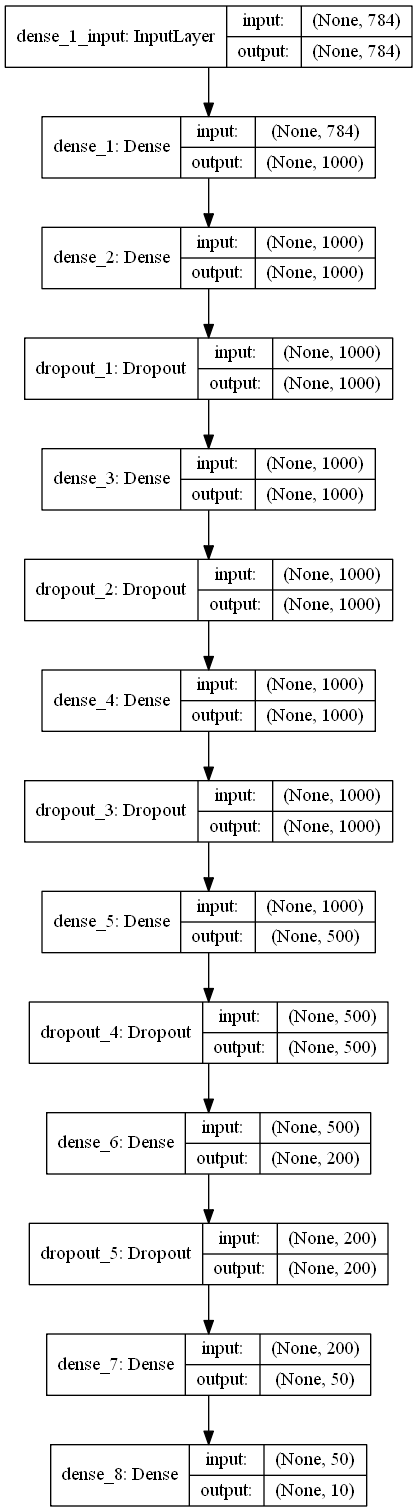

In [61]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model.png',
          show_shapes=True, show_layer_names=True)

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)             

In [63]:
# 실제 데이터 사용
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
xTest = x_test.reshape(10000,784).astype('float32')/255
yTest = np_utils.to_categorical(y_test)
idx = np.random.choice(xTest.shape[0], 10)
xhat = xTest[idx]
# 모델 불러오기
from keras.models import load_model
model = load_model('mnist_model.h5')
yhat = model.predict_classes(xhat)
print(yhat)
print(np.argmax(yTest[idx], axis=1))


[8 2 5 1 5 2 7 9 1 4]
[8 2 5 1 5 2 7 9 1 4]


C:\Users\chan\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


새로운 것

In [64]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [65]:
def myMinMax(data):
    bj = data-np.min(data,0)
    bm = np.max(data,0)-np.min(data,0)
    return bj/bm

xy = myMinMax(xy)

In [66]:
xdata = xy[:,:-1]
ydata = xy[:,[-1]]

In [67]:
x = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

In [68]:
hf = tf.matmul(x,w)+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [69]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [70]:
for step in range(101):
    cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:xdata,y:ydata})
    print(step, 'cost : ', cv, '\nPrediction: ', hv)
# 예측값이 그 값이 아님
# 다시 역 정규화 필요 ! 
# 숙제

0 cost :  0.86448663 
Prediction:  [[-0.40190804]
 [-0.88883924]
 [-0.2278496 ]
 [ 0.5358351 ]
 [ 0.08680308]
 [ 0.13906765]
 [ 0.82918286]
 [ 0.71908957]]
1 cost :  0.61991477 
Prediction:  [[-0.07106638]
 [-0.58231115]
 [ 0.01881099]
 [ 0.7150154 ]
 [ 0.30978882]
 [ 0.35227996]
 [ 0.9484509 ]
 [ 0.8323272 ]]
2 cost :  0.5127157 
Prediction:  [[ 0.14297688]
 [-0.38845956]
 [ 0.17159832]
 [ 0.8215462 ]
 [ 0.44663262]
 [ 0.48232573]
 [ 1.012342  ]
 [ 0.89131975]]
3 cost :  0.458695 
Prediction:  [[ 0.28452122]
 [-0.2642566 ]
 [ 0.26641476]
 [ 0.8832881 ]
 [ 0.5302817 ]
 [ 0.56104046]
 [ 1.0423001 ]
 [ 0.9171644 ]]
4 cost :  0.42568448 
Prediction:  [[ 0.38094133]
 [-0.18312442]
 [ 0.32543576]
 [ 0.9174479 ]
 [ 0.5810868 ]
 [ 0.60808724]
 [ 1.0515625 ]
 [ 0.9228805 ]]
5 cost :  0.40136787 
Prediction:  [[ 0.44915813]
 [-0.12864625]
 [ 0.36235785]
 [ 0.934652  ]
 [ 0.61161774]
 [ 0.63561046]
 [ 1.0482976 ]
 [ 0.9164985 ]]
6 cost :  0.38100585 
Prediction:  [[ 0.4996344 ]
 [-0.09068179]
 [

82 cost :  0.026797043 
Prediction:  [[1.082284  ]
 [0.51209503]
 [0.52193534]
 [0.55888826]
 [0.56145406]
 [0.5331947 ]
 [0.28315982]
 [0.1961346 ]]
83 cost :  0.026133463 
Prediction:  [[1.0828388 ]
 [0.5163177 ]
 [0.52294827]
 [0.5563463 ]
 [0.5607511 ]
 [0.53235555]
 [0.27962783]
 [0.19395411]]
84 cost :  0.025491497 
Prediction:  [[1.0833461 ]
 [0.52048206]
 [0.5239501 ]
 [0.5538457 ]
 [0.5600587 ]
 [0.53153104]
 [0.27617106]
 [0.19184032]]
85 cost :  0.024870358 
Prediction:  [[1.0838082 ]
 [0.52458894]
 [0.5249411 ]
 [0.5513859 ]
 [0.55937696]
 [0.53072107]
 [0.27278763]
 [0.18979111]]
86 cost :  0.024269294 
Prediction:  [[1.0842268 ]
 [0.52863884]
 [0.5259211 ]
 [0.54896605]
 [0.5587054 ]
 [0.5299252 ]
 [0.26947576]
 [0.18780434]]
87 cost :  0.023687568 
Prediction:  [[1.0846038 ]
 [0.53263265]
 [0.52689034]
 [0.54658544]
 [0.5580441 ]
 [0.5291432 ]
 [0.26623362]
 [0.185878  ]]
88 cost :  0.02312448 
Prediction:  [[1.0849408 ]
 [0.5365711 ]
 [0.5278488 ]
 [0.54424334]
 [0.5573

In [93]:
# 단일 멀티 퍼셉트론 각각 구현

xdata = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
ydata = np.array(([[0],[1],[1],[0]]))

w = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1]))
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

hf = tf.sigmoid(tf.matmul(x,w) + b)
# loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=hf, labels=y)
loss = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
prediction = tf.cast(hf>=0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,y),dtype=tf.float32))

In [94]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(10000):
        _, cv = sess.run([train, loss], feed_dict={x:xdata,y:ydata})
        if epoch%500 == 0:
            print('cv : {:.3f}'.format(cv))
    pred, acc = sess.run([prediction, accuracy], feed_dict={x:xdata, y:ydata})
    print('정확도 : {:.3f}'.format(acc))
    print(pred)

cv : 1.109
cv : 1.032
cv : 0.968
cv : 0.917
cv : 0.876
cv : 0.844
cv : 0.819
cv : 0.800
cv : 0.785
cv : 0.773
cv : 0.764
cv : 0.757
cv : 0.751
cv : 0.746
cv : 0.742
cv : 0.739
cv : 0.735
cv : 0.733
cv : 0.730
cv : 0.728
정확도 : 0.250
[[1.]
 [0.]
 [1.]
 [1.]]


멀티 레이어

In [98]:
# 단일 멀티 퍼셉트론 각각 구현

xdata = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
ydata = np.array(([[0],[1],[1],[0]]))

x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

w1 = tf.Variable(tf.random_normal(shape=[2, 10]))
b1 = tf.Variable(tf.random_normal(shape=[10]))
layer1 = tf.sigmoid(tf.matmul(x,w1) + b1)

w2 = tf.Variable(tf.random_normal(shape=[10, 1]))
b2= tf.Variable(tf.random_normal(shape=[1]))
hf = tf.sigmoid(tf.matmul(layer1,w2) + b2)

# loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=hf, labels=y)
loss = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
prediction = tf.cast(hf>0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,y),dtype=tf.float32))

In [100]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(10000):
        _, cv = sess.run([train, loss], feed_dict={x:xdata,y:ydata})
        if epoch%1000 == 0:
            print('cv : {:.3f}'.format(cv))
    pred, acc, hv = sess.run([prediction, accuracy, hf], feed_dict={x:xdata, y:ydata})
    print('정확도 : {:.3f}'.format(acc))
    print(hv)
    print(pred)


cv : 0.746
cv : 0.447
cv : 0.108
cv : 0.043
cv : 0.025
cv : 0.017
cv : 0.013
cv : 0.010
cv : 0.008
cv : 0.007
정확도 : 1.000
[[0.00529928]
 [0.99420255]
 [0.9937323 ]
 [0.00714059]]
[[0.]
 [1.]
 [1.]
 [0.]]


# Wide & Deep

In [105]:
xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
ydata = np.array(([[0],[1],[1],[0]]))

x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

w1 = tf.Variable(tf.random_normal(shape=[2, 10]))
b1 = tf.Variable(tf.random_normal(shape=[10]))
layer1 = tf.nn.relu(tf.matmul(x,w1) + b1)

w2 = tf.Variable(tf.random_normal(shape=[10, 10]))
b2 = tf.Variable(tf.random_normal(shape=[10]))
layer2 = tf.nn.relu(tf.matmul(layer1,w2) + b2)

w3 = tf.Variable(tf.random_normal(shape=[10, 10]))
b3 = tf.Variable(tf.random_normal(shape=[10]))
layer3 = tf.nn.relu(tf.matmul(layer2,w3) + b3)

w4 = tf.Variable(tf.random_normal(shape=[10, 1]))
b4= tf.Variable(tf.random_normal(shape=[1]))
hf = tf.sigmoid(tf.matmul(layer3,w4) + b4)

loss = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
prediction = tf.cast(hf>0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,y),dtype=tf.float32))

In [106]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(10000):
        _, cv = sess.run([train, loss], feed_dict={x:xdata,y:ydata})
        if epoch%1000 == 0:
            print('cv : {:.3f}'.format(cv))
    pred, acc, hv = sess.run([prediction, accuracy, hf], feed_dict={x:xdata, y:ydata})
    print('정확도 : {:.3f}'.format(acc))
    print(hv)
    print(pred)

cv : 1.878
cv : 0.000
cv : 0.000
cv : 0.000
cv : 0.000
cv : 0.000
cv : 0.000
cv : 0.000
cv : 0.000
cv : 0.000
정확도 : 1.000
[[9.9791541e-06]
 [9.9998200e-01]
 [9.9998236e-01]
 [2.3946883e-05]]
[[0.]
 [1.]
 [1.]
 [0.]]


Keras

In [ ]:
# Dense(units=32, input_dim=4, init='uniform', activation='relu')